# Tutorial for creating simulated PSFs for "synthetic RDI" 

This notebook demonstrates how to create simulated coronagraphic reference PSFs using WebbPSF and spaceKLIP. The output PSFs are written to disk in the same file format as regular science data, so they can (in principle) be used straightforwardly as synthetic references for RDI. 

We demonstrate this again using the NIRCam and MIRI coronagraphy data on HIP 65426 b 
from the JWST ERS program on Direct Observations of Exoplanetary Systems, program 1386. 



<div class="alert alert-block alert-warning">
<b>Cautionary Note:</b> This functionality is still in development. You should make your own assessment of how well the output PSFs work for PSF subtraction. The coronagraphic PSF models in WebbPSF have not yet been tuned in detail to match in-flight measured coronagraphic PSFs, so are of only moderate fidelity currently. 
</div>


<div class="alert alert-block alert-success">
<b>Relation to other tutorials:</b> This notebook assumes you have already run the MIRI and NIRCam reduction notebooks, so we can use some of the files from those. 
</div>

In [1]:
%matplotlib inline
import numpy as np
import scipy.optimize
import os
import spaceKLIP, spaceKLIP.synthetic_psfs

import scipy.ndimage
from skimage.registration import phase_cross_correlation

## Making synthetic PSFs for MIRI

In [2]:
# name the subdirectory where we have the data for this tutorial
# We assume here you have already downloaded science data here following the instructions in tutorial_NIRCam_reductions.ipynb
data_root = 'data_miri_hd65426'

### Let's pick and examine some observed science file:

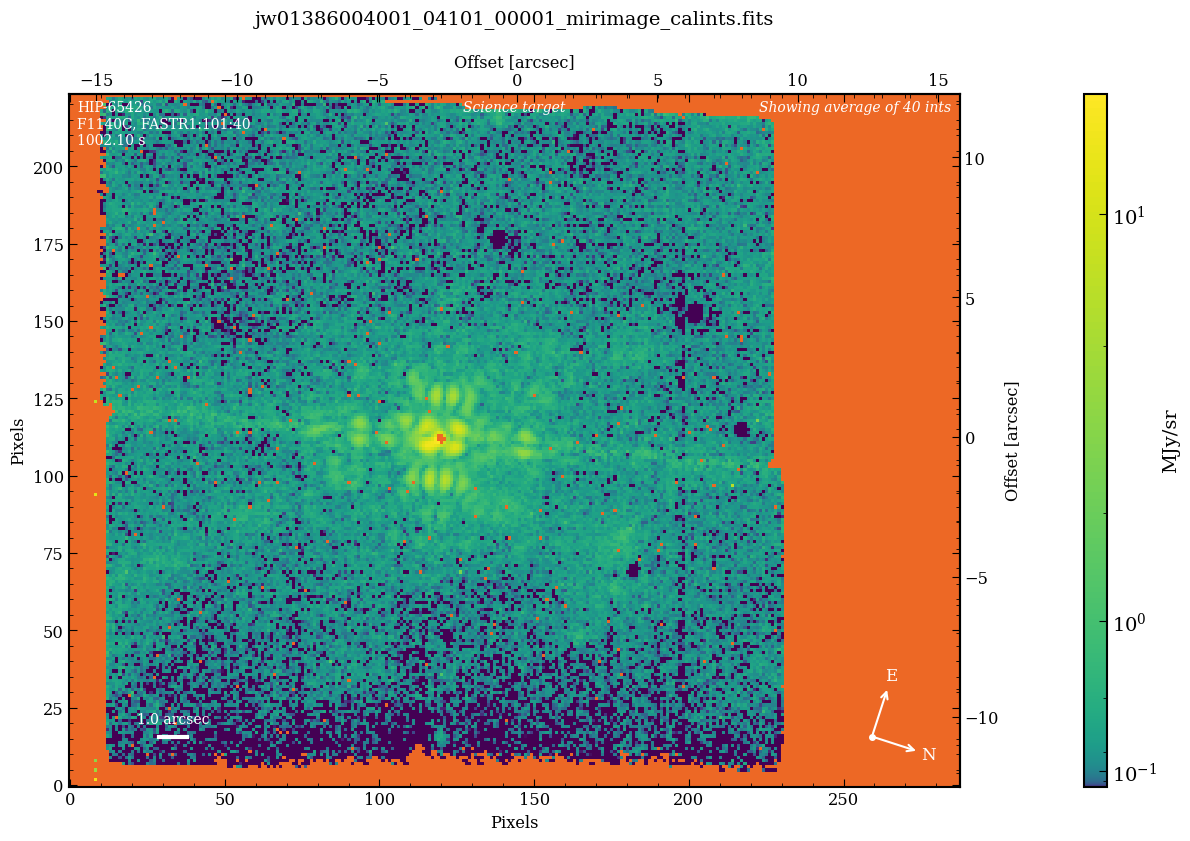

In [3]:
sci_filename = 'data_miri_hd65426/bgsub/jw01386004001_04101_00001_mirimage_calints.fits'

spaceKLIP.plotting.display_coron_image(sci_filename);

### make a directory to save the output synthetic PSFs

In [4]:
output_dir = os.path.join(data_root, "sim_PSFs")
os.makedirs(output_dir, exist_ok=True)

### Make a synthetic RDI PSF

Just one, no dithering here. 

This automatically configures a webbpsf instrument model to match the instrument mode and date of observation of that science file, then computes a PSF. 

*** Setting up MIRI simulation instance to match jw01386004001_04101_00001_mirimage_calints.fits
Setting up sim to match data_miri_hd65426/bgsub/jw01386004001_04101_00001_mirimage_calints.fits
iterating query, tdelta=3.0

MAST OPD query around UTC: 2022-07-17T18:39:21.141
                        MJD: 59777.777328020835

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2022071702-NRCA3_FP1-1.fits
	Date (MJD):	 59777.4424
	Delta time:	 -0.3349 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2022071902-NRCA3_FP1-1.fits
	Date (MJD):	 59779.6513
	Delta time:	 1.8740 days
User requested choosing OPD time closest in time to 2022-07-17T18:39:21.141, which is R2022071702-NRCA3_FP1-1.fits, delta time -0.335 days
Importing and format-converting OPD from /Users/mperrin/software/webbpsf-data/MAST_JWST_WSS_OPDs/R2022071702-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point

Configured simulation instrument f

['data_miri_hd65426/sim_PSFs/syn02586137001_04101_00001_mirimage_calints.fits']

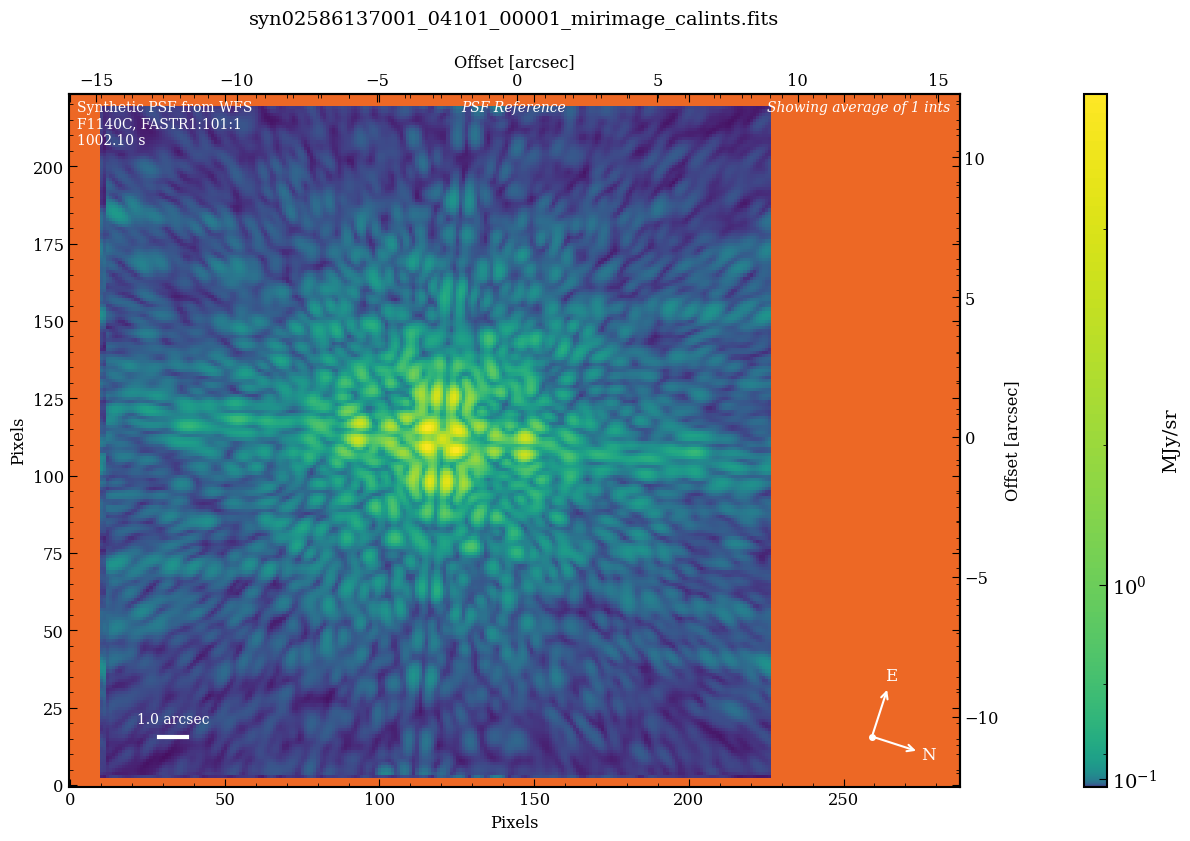

In [5]:
spaceKLIP.synthetic_psfs.create_miri_synthetic_psf(sci_filename, output_dir=output_dir)

## Making synthetic PSFs for NIRCam

In [ ]:
# name the subdirectory where we have the data for this tutorial
# We assume here you have already downloaded science data here following the instructions in tutorial_NIRCam_reductions.ipynb
data_root = 'data_nircam_hd65426'

In [ ]:
!ls data_nircam_hd65426/bpcleaned/jw01386001001_0310?_00001_nrcalong_calints.fits

### Let's pick and examine some observed science file:

In [ ]:
!ls -l data_nircam_hd65426/bpcleaned/jw01386002001_0310?_00001_nrcalong_calints.fits

In [ ]:
sci_filename = 'data_nircam_hd65426/bpcleaned/jw01386002001_03109_00001_nrcalong_calints.fits'

In [ ]:
spaceKLIP.plotting.display_coron_image(sci_filename);